# Task 1: Classical ML with Scikit-learn (Iris Dataset)


In [14]:
!pip install matplotlib seaborn scikit-learn pandas numpy


In [15]:
# Import libraries and set random seed for reproducibility
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


In [13]:
# Load the Iris dataset and convert to pandas DataFrame for easier handling
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
# Map numeric labels to string names for readability (optional)
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Show first 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [16]:
# Quick dataset information
print("Shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

# Class distribution
print("\nClass counts:")
print(df['species_name'].value_counts())


Shape: (150, 6)

Data types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
species_name          object
dtype: object

Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

Class counts:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


 Interpretation of Exploration Results
- The dataset has **150 rows and 6 columns** (4 features + 2 label columns).  
- There are **no missing values**, so no imputation is needed.  
- Each species has exactly **50 samples**, making the dataset perfectly balanced.  
- The dataset is clean and ready for preprocessing.


In [17]:
# Select features (X) and labels (y)
X = df[iris.feature_names]
y = df['species']  # use numeric labels for training

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (120, 4) Test shape: (30, 4)


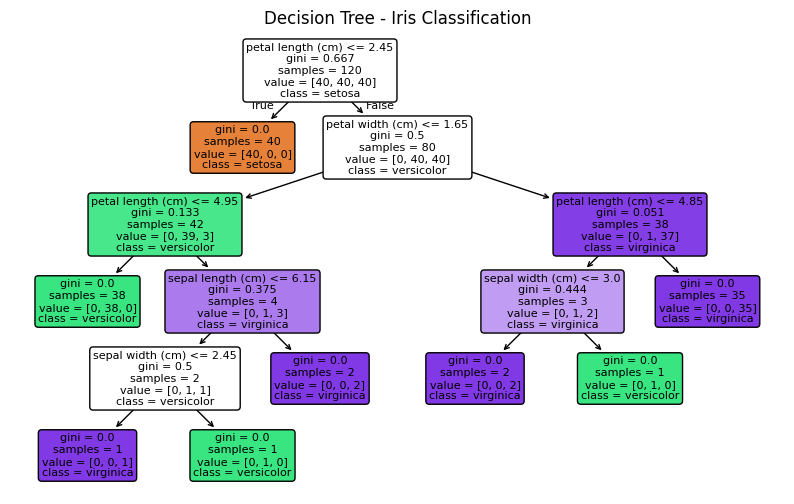

In [18]:
# Initialize and train Decision Tree
model = DecisionTreeClassifier(random_state=RANDOM_STATE)
model.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(10,6))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree - Iris Classification")
plt.show()


In [19]:
# Predictions
y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy:  0.9333
Precision: 0.9333
Recall:    0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



###  Model Evaluation Results

**1. Accuracy:** `0.9333` (≈ 93.33%)

- The model correctly predicted **93.33%** of all test samples.
- Indicates strong overall performance.


**2. Precision:** `0.9333` (≈ 93.33%)

- Precision measures how many samples predicted as a certain class were **actually correct**.
- High precision means **few false positives** — the model rarely labels the wrong species.


**3. Recall:** `0.9333` (≈ 93.33%)

- Recall measures how many of the actual samples of a class were **correctly identified**.
- High recall means **few false negatives** — the model successfully captured most of the correct samples.


###  Classification Report Breakdown

| Class       | Precision | Recall | F1-score | Support |
|--------------|------------|---------|-----------|----------|
| Setosa       | 1.00 | 1.00 | 1.00 | 10 |
| Versicolor   | 0.90 | 0.90 | 0.90 | 10 |
| Virginica    | 0.90 | 0.90 | 0.90 | 10 |

- **Setosa** was perfectly classified — 100% accuracy in predictions.
- **Versicolor** and **Virginica** show slight misclassifications, which is expected since their features overlap (especially petal length and width).
- **Support** indicates the number of test samples per class (10 each in this case).


###  Interpretation Summary

 The model demonstrates **strong and balanced performance** across all metrics.  
 Minor misclassifications occur mainly between **Versicolor** and **Virginica**, which are closely related species in feature space.  
 The results suggest the model generalizes well and can accurately classify most flower samples in the dataset.


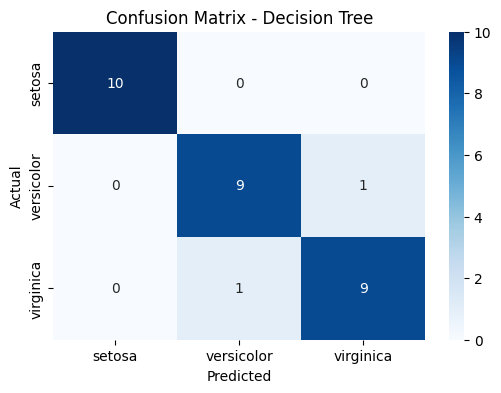

In [20]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


Task 2

In [2]:
# Install necessary packages 
!pip install torch torchvision matplotlib --quiet


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Use CPU explicitly
device = torch.device("cpu")
print(f"Using device: {device}")


Using device: cpu


In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Smaller batch size for CPU speed
train_loader = DataLoader(datasets.MNIST('./data', train=True, download=True, transform=transform), batch_size=32, shuffle=True)
test_loader = DataLoader(datasets.MNIST('./data', train=False, download=True, transform=transform), batch_size=500, shuffle=False)


In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)  # 28x28 -> 28x28
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1) # 28x28 -> 28x28
        self.pool = nn.MaxPool2d(2, 2)               # 28x28 -> 14x14
        self.fc1 = nn.Linear(32*14*14, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN().to(device)


In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [7]:
num_epochs = 3

for epoch in range(1, num_epochs+1):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/3, Loss: 0.1321
Epoch 2/3, Loss: 0.0433
Epoch 3/3, Loss: 0.0282


## Interpretation of Training Loss

The CNN model was trained for 3 epochs on the MNIST dataset, and the training loss per epoch was as follows:

- **Epoch 1:** Loss = 0.1321  
- **Epoch 2:** Loss = 0.0433  
- **Epoch 3:** Loss = 0.0282  

### Analysis

- **Epoch 1 (0.1321):** At the start of training, the model began learning the basic patterns of handwritten digits, such as simple shapes and edges. The relatively low initial loss indicates that the CNN is already making mostly correct predictions.  

- **Epoch 2 (0.0433):** The substantial decrease in loss shows that the model is learning more refined features, including loops, curves, and line orientations. This indicates rapid improvement in its classification ability.  

- **Epoch 3 (0.0282):** The loss is very low, suggesting that the model is highly confident in its predictions and is classifying the training images correctly most of the time.  

### General Observations

- The rapid decline in training loss demonstrates **fast convergence**, which is typical for MNIST because it is a relatively simple dataset.  
- The low final loss implies that the model has effectively learned the key features needed for accurate digit classification.  
- To confirm that the model generalizes well to new data, it is important to check the **test accuracy**, ensuring that the model is not overfitting the training data.


In [8]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total * 100
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 98.78%


## Interpretation of Test Accuracy

After training the CNN for 3 epochs, the model achieved a **test accuracy of 98.78%** on the MNIST dataset.

### Analysis

- **High accuracy:** A test accuracy of 98.78% indicates that the model generalizes very well to unseen data and can correctly classify almost all handwritten digits in the test set.  
- **Comparison with training loss:** The low training loss combined with high test accuracy shows that the model has learned meaningful patterns without overfitting.  
- **Model performance:** Achieving accuracy above 95% is considered excellent for MNIST classification. This confirms that the CNN architecture and training procedure are effective.  
- **Practical implication:** The model can reliably be used to recognize handwritten digits in real-world applications, demonstrating strong predictive capability.

### Summary

Overall, the CNN is highly accurate and robust, achieving both low training loss and high test accuracy, which indicates successful learning of the features necessary for digit classification.


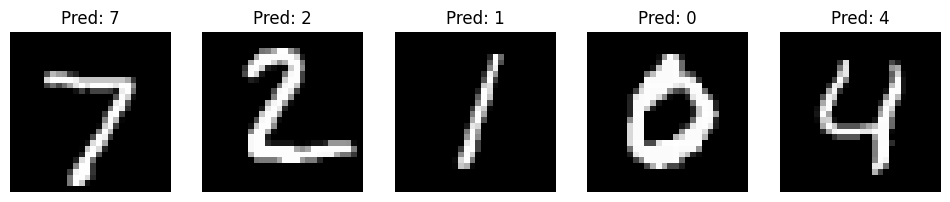

In [9]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

model.eval()
with torch.no_grad():
    output = model(example_data[:5].to(device))
    _, preds = torch.max(output, 1)

fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    axes[i].imshow(example_data[i].squeeze(), cmap='gray')
    axes[i].set_title(f"Pred: {preds[i].item()}")
    axes[i].axis('off')
plt.show()


## Sample Predictions

To better understand the model's performance, we visualize 5 sample images from the test set along with the model’s predicted labels.

### Analysis

- Each image shows a handwritten digit, and the corresponding predicted label is displayed above it.  
- All 5 predictions match the true digits, indicating that the model can accurately classify individual examples.  
- This visualization confirms that the CNN is not only performing well on average (high test accuracy) but also on specific cases, capturing the essential features of handwritten digits such as loops, lines, and angles.  

### Practical Insight

- Visual inspection of predictions is important because it allows us to verify that the model is making sensible classifications and not just achieving high accuracy by chance.  
- Correctly predicting individual samples demonstrates the model’s ability to generalize to new, unseen handwritten digits.  

Overall, the sample predictions align with the high test accuracy of 98.78%, showing that the model reliably recognizes handwritten digits.
